In [1]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


([<matplotlib.patches.Wedge at 0x180e3c42e40>,
 [Text(-0.8823432229396718, 0.656864093197697, '0'),
  Text(0.8823431237559431, -0.6568642264278096, '1')],
 [Text(-0.4812781216034573, 0.358289505380562, '79.6%'),
  Text(0.48127806750324165, -0.35828957805153244, '20.4%')])

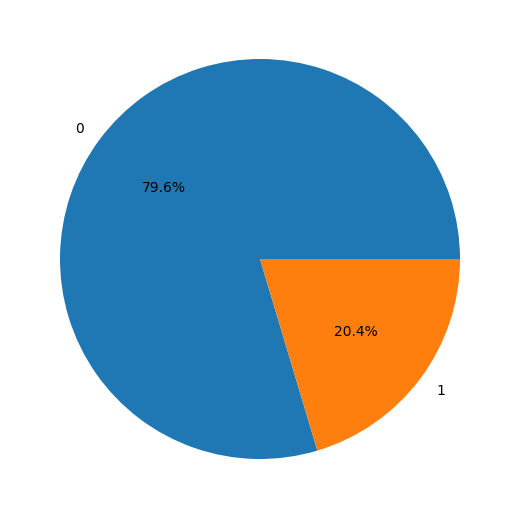

In [2]:
# 9.1

# Смотрим количество строк в колонке со статусом лояльности
customers = churn_data['Exited'].value_counts() 
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    customers,
    labels=customers.index,
    autopct='%.1f%%',
)

Вывод: количество лояльных клиентов составляет 79.6%, а ушедших 20.4%, то есть банк потерял 1/5 своих клиентов

([<matplotlib.patches.Wedge at 0x180e5d12350>,
 [Text(-0.4630349047577533, 0.9977969116889361, 'True'),
  Text(0.463034754094606, -0.9977969816052502, 'False')],
 [Text(-0.25256449350422905, 0.5442528609212378, '63.8%'),
  Text(0.2525644113243305, -0.5442528990574091, '36.2%')])

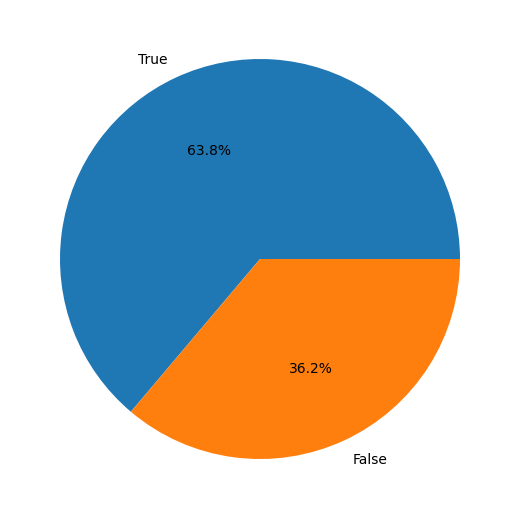

In [3]:
# 9.2

# Создадим маску, где баланс клиентов больше 2500 долларов
balance_customer = churn_data['Balance'] > 2500
# Теперь посчитаем количество тех, у кого баланс больше 2500 и меньше 2500
balance_customer = balance_customer.value_counts()
# Строим диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    balance_customer,
    labels=balance_customer.index,
    autopct='%.1f%%',
)

Вывод: количество клиентов банка, у которых баланс больше 2500 долларов составил 63.8 %, что почти в 2 раза больше, чем клиентов с балансом меньше 2500, их количество составило 36.2 %

In [4]:
# 9.3

fig = px.histogram(churn_data,
    x='Balance',
    nbins=30,
    title='Распределение баланса клиентов по оттоку',
    color="Exited",
    color_discrete_sequence=['red', 'blue'],
    opacity=0.6)
fig.update_xaxes(title_text='Баланс')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()

Вывод: большинство ушедших клиентов банка с 0 балансом, возможно их не устроили условия банка, клиенты снимали деньги и закрывали карты

In [5]:
# 9.4

fig = px.histogram(churn_data,
    x='Age',
    nbins=30,
    title='Распределение возраста клиентов по оттоку',
    color="Exited",
    color_discrete_sequence=['red', 'blue'],
    opacity=0.6)
fig.update_xaxes(title_text='Возраст клиентов')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()

Максимальное количество ушедших клиентов наблюдается у возрастной группы 40-44 года и 45-49 лет,на эти возрастные группы стоит обратить внимание банку

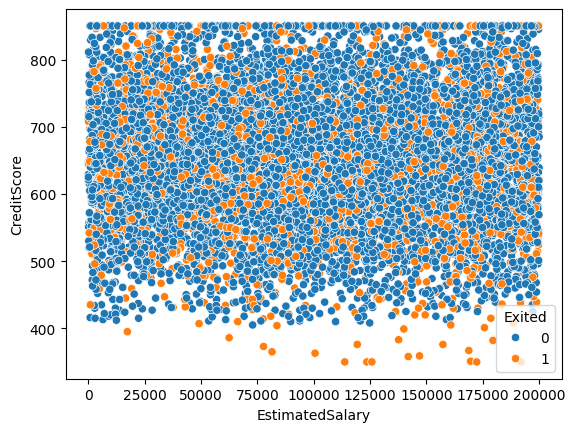

In [6]:
# 9.5

joinplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
)

Не могу определить взаимосвязь :с

In [8]:
# 9.6

fig = px.histogram(churn_data,
    x='Gender',
    nbins=30,
    title='Пол ушедших клиентов',
    color="Exited",
    color_discrete_sequence=['red', 'blue'],
    opacity=0.6)
fig.update_xaxes(title_text='Пол')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()

Вывод: большая часть ушедних клиентов - женщины

In [ ]:
# 9.7

fig = px.histogram(churn_data,
    x='NumOfProducts',
    nbins=30,
    title='Зависимость количества услуг от оттока клиентов',
    color="Exited",
    color_discrete_sequence=['red', 'blue'],
    barmode='group',
    opacity=0.6)
fig.update_xaxes(title_text='Количество услуг')
fig.update_yaxes(title_text='Количество клиентов')
fig.show()

In [20]:
# 9.7 second option

products = churn_data.groupby(by=['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=products,
    x = 'NumOfProducts',
    y = 'CustomerId',
    color = 'Exited',
    text_auto=True,
    height=500,
    width=1000,
    title='Зависимость оттока клиентов от количества услуг',
    barmode='group'
)
fig.show()

Вывод: с количеством приобретенных услуг падает количество ушедших клиентов, наибольшее количество уходит после приобретения 1 услуги

P.S. Составил 2 графика, подскажите, пожалуйста, какой наиболее наглядный/точный, сначала я сделал привычным для себя способом, т.к. на мой взгляд он проще, потом сделал так, как требовалось в задании, т.е. многоуровневой диаграммой, но потратил больше времени на ее построение

In [25]:
# 9.8

clients_status = churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=clients_status,
    x = 'IsActiveMember',
    y = 'CustomerId',
    color = 'Exited',
    text_auto=True,
    height=500,
    width=1000,
    title='Влияние наличия статуса клиента на отток',
    barmode='group'
)
fig.show()

Вывод: неактивные клиенты чаще уходят, чем активные, можно предложить ввести какую-нибудь выгодную акцию для активных клиентов банка, чтобы замотивировать неактивных клиентов приобрести статус активного, либо небольшой бонус для тех, кто становится активным клиентом, чтобы мотивировать не только получить статус "активного клиента", но и уменьшить предпосылки для потери этих же клиентов

In [3]:
# 9.9

exited_clients = churn_data.groupby('Geography')['Exited'].mean().reset_index()

fig = px.choropleth(
    data_frame= exited_clients,
    locations= 'Geography',
    locationmode= 'country names',
    color='Exited',
    range_color= [0, 35],
    title= 'Соотношение ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale= 'Reds'
)

fig.show()

Вывод: большая доля ушедших клиентов приходится на Германию, это может быть связано с трудностями использования Евро в этом банке

Text(0.5, 1.0, 'Тепловая карта')

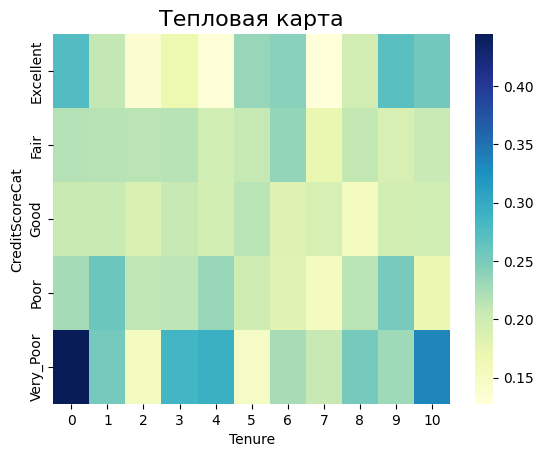

In [50]:
# 9.10

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value='-'
)

heatmap = sns.heatmap(data=table,cmap='YlGnBu')
heatmap.set_title('Тепловая карта', fontsize=16)

Вывод: чаще всего уходят клиенты на первом году пользования услугами банка с очень плохой кредитной историей